In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gridworld
import torch

In [13]:
env = gridworld.GridWorld(hard_version=False)

In [14]:
n_s = env.num_states
n_a = env.num_actions
T = env.max_num_steps
gamma = 1

In [15]:
def policy(s, theta):
    logits = torch.nn.functional.softmax(theta[s,:],dim=0)
    return torch.distributions.categorical.Categorical(logits=logits)

def action(s, theta):
    return policy(s,theta).sample().item()

def generate_episode(theta):
    states = torch.zeros(T+1, dtype = int)
    actions = torch.zeros(T+1, dtype = int)
    rewards = torch.zeros(T+1)
    states[0] = env.reset()
    done = False
    t = 0
    actions[t] = action(states[t].item(),theta)
    while not done:
        t+=1
        (states[t], rewards[t], done) = env.step(actions[t-1])
        actions[t] = action(states[t].item(),theta)
    return states, actions, rewards

def loss(G, theta, t, s, a, gamma):
    return -(gamma**t)*G*policy(s,theta).log_prob(torch.tensor([a]))

In [16]:
theta_0 = torch.rand(n_s,n_a)
theta = theta_0.requires_grad_(requires_grad=True)
n_episodes = int(2e3)
optimizer = torch.optim.SGD([theta], lr = 1e-2)
reward_array = torch.zeros(n_episodes)

In [204]:
for n in range(n_episodes):
    if n%1000 == 0:
        lr = 5e-3
    states, actions, rewards = generate_episode(theta)
    for t in range(T):
        G = 0
        for k in range(t+1,T,1):
            G+= gamma**(k-t-1)*rewards[k]
        optimizer.zero_grad()
        loss_value = loss(G, theta, t, states[t], actions[t], gamma)
        loss_value.backward()
        optimizer.step()
    reward_array[n] = rewards.sum()

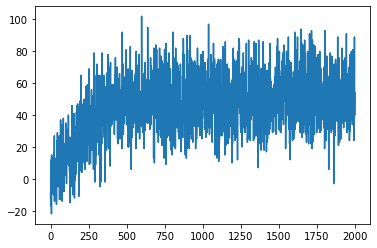

In [205]:
plt.plot(reward_array)

In [17]:
theta

tensor([[0.5771, 0.9070, 0.6014, 0.2469],
        [0.8030, 0.2273, 0.5096, 0.8182],
        [0.4034, 0.1690, 0.2417, 0.0486],
        [0.3329, 0.7964, 0.0129, 0.1131],
        [0.7650, 0.0670, 0.3082, 0.6922],
        [0.3066, 0.1867, 0.7868, 0.4220],
        [0.3313, 0.6846, 0.1899, 0.1146],
        [0.0690, 0.1222, 0.4262, 0.8043],
        [0.6739, 0.6286, 0.8536, 0.8933],
        [0.8771, 0.9169, 0.5851, 0.4129],
        [0.4457, 0.3401, 0.9159, 0.7584],
        [0.4558, 0.2060, 0.6531, 0.1695],
        [0.0500, 0.8384, 0.8387, 0.4652],
        [0.6377, 0.7331, 0.5470, 0.7913],
        [0.4695, 0.0484, 0.3251, 0.7831],
        [0.6666, 0.2638, 0.5527, 0.4696],
        [0.3449, 0.0314, 0.3387, 0.9608],
        [0.3611, 0.7257, 0.7149, 0.1029],
        [0.7715, 0.7513, 0.7683, 0.9918],
        [0.3398, 0.1047, 0.3847, 0.7108],
        [0.7739, 0.0325, 0.6583, 0.8423],
        [0.9812, 0.2654, 0.0611, 0.5396],
        [0.0999, 0.7810, 0.4784, 0.5722],
        [0.2529, 0.1686, 0.6827, 0

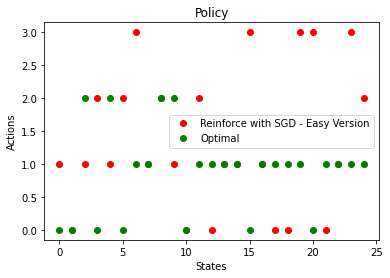

In [23]:
optimal_p = np.array([0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])
actions = np.zeros(n_s)

for i in range(n_s):
    actions[i] = action(i, theta)

plt.plot(actions, 'ro', label="Reinforce with SGD - Easy Version")
plt.plot(optimal_p, 'go', label="Optimal")
plt.title("Policy")
plt.xlabel("States")
plt.ylabel("Actions")
plt.legend()